In [5]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot comparison of Spectrum2D & Lowes Spectrums of `PINN models` and `SH models`
##################################################################
# %%
# # ! Setup
import numpy as np;
from scipy import linalg;
from scipy import stats;
import matplotlib as mpl;
import matplotlib.pyplot as plt;
import matplotlib.colors as colors;
from matplotlib.ticker import LogLocator as LL;
from matplotlib.ticker import FuncFormatter as FF;
from LW_SH_Mag import *;

In [6]:
# %%

def SHCs_to_Spectrum2d(shcFile, nmax):
    ######## Load
    if(isinstance(shcFile,str)):
        ghSHCs = np.loadtxt(shcFile,skiprows=1,usecols=1);
    else:
        ghSHCs = shcFile;
    ######## Re-arrange
    Spec2D = np.full((nmax, 2*nmax+1), np.nan);
    ind=0;
    for n in np.arange(1,nmax+1):
        for m in range(0,n+1):
            Spec2D[n-1,nmax+m] = ghSHCs[ind];
            ind = ind + 1;
            if m>0:
                Spec2D[n-1,nmax-m] = ghSHCs[ind];
                ind = ind + 1;
    return Spec2D;

In [7]:
# %%

# # ! Data
######## SHCs Files
fileSHCs_JRM33 = 'input/JRM33_I30.txt';
fileSHCs_Baseline = 'input/Bloxham_I32.txt';
fileSHCs_NN06_040_PINN33e_1d00Rj = 'output/NN06_040_PINN33e_1.00Rj_I35.txt';
fileSHCs_NN06_040_PINN50e_1d00Rj = 'output/NN06_040_PINN50e_1.00Rj_I35.txt';
fileSHCs_NN06_040_PINN50i_0d85Rj = 'output/NN06_040_PINN50i_0.85Rj_I35.txt';
fileSHCs_NN06_040_PINN50i_0d80Rj = 'output/NN06_040_PINN50i_0.80Rj_I35.txt';
######## Direct SHCs
ghSHCs_JRM33 = np.loadtxt(fileSHCs_JRM33,skiprows=1,usecols=1);
ghSHCs_Baseline = np.loadtxt(fileSHCs_Baseline,skiprows=1,usecols=1);
ghSHCs_NN06_040_PINN33e_1d00Rj = np.loadtxt(fileSHCs_NN06_040_PINN33e_1d00Rj,skiprows=1,usecols=1);
ghSHCs_NN06_040_PINN50e_1d00Rj = np.loadtxt(fileSHCs_NN06_040_PINN50e_1d00Rj,skiprows=1,usecols=1);
ghSHCs_NN06_040_PINN50i_0d85Rj = np.loadtxt(fileSHCs_NN06_040_PINN50i_0d85Rj,skiprows=1,usecols=1);
ghSHCs_NN06_040_PINN50i_0d80Rj = np.loadtxt(fileSHCs_NN06_040_PINN50i_0d80Rj,skiprows=1,usecols=1);

C:\Users\lawyer\AppData\Local\Temp\ipykernel_9552\200912337.py:45: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb1=fig1.colorbar(pc1,cax=ax0.inset_axes([1.1, 0.00, 0.05, 1.0]),orientation='vertical');
C:\Users\lawyer\AppData\Local\Temp\ipykernel_9552\200912337.py:124: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('Fig5.png',dpi=300,bbox_inches='tight');
e:\anaconda3\envs\SHTools_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


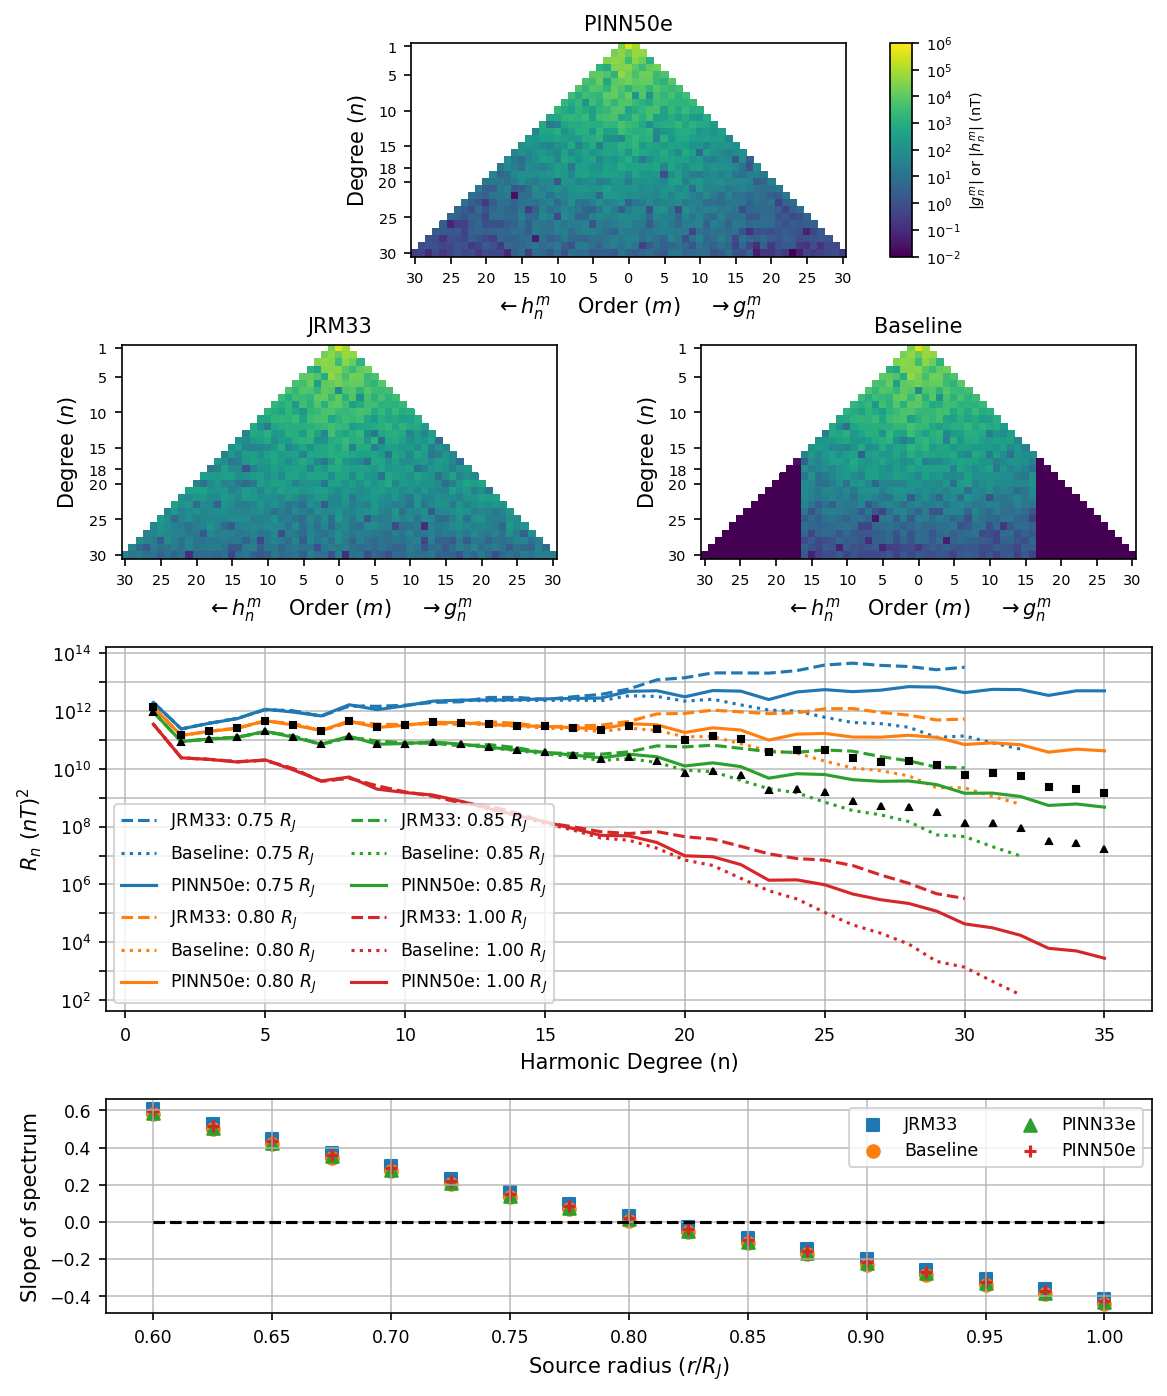

In [8]:
# %%

# # ! Plot 2D & Lowes Spectrum
# TODO ******************** Parameters ******************** #
nmax_2D = 30;
nmax_JRM33 = 30;
nmax_Baseline = 32;   
nmax_PINN = 35;    
RS = [0.75, 0.80, 0.85, 1.00];
COLORs = ['C0', 'C1', 'C2', 'C3'];
LS = ['-', '--', ':'];
# TODO ********************** end ************************* #
fig1 = plt.figure(figsize=(9,11), dpi=150,layout='constrained');
gs = fig1.add_gridspec(nrows=17, ncols=11);
gsLST=[gs[0:3,3:8],gs[4:7,0:5],gs[4:7,6:11],
         gs[8:13,0:11],gs[14:17,0:11]];

######## 2D Spectrum
titleNames = ['PINN50e','JRM33','Baseline'];
spec2d_PINN50e = SHCs_to_Spectrum2d(ghSHCs_NN06_040_PINN50e_1d00Rj, nmax_2D);
spec2d_JRM33 = SHCs_to_Spectrum2d(ghSHCs_JRM33, nmax_2D);
spec2d_Baseline = SHCs_to_Spectrum2d(ghSHCs_Baseline, nmax_2D);
M2d,N2d = np.meshgrid(np.linspace(-nmax_2D,nmax_2D,2*nmax_2D+1),np.linspace(1,nmax_2D,nmax_2D));
DataLst=[spec2d_PINN50e,spec2d_JRM33,spec2d_Baseline];
AXES=[];
for iData in range(len(DataLst)):
    ax0 = fig1.add_subplot(gsLST[iData]);
    AXES.append(ax0);
    ax0.set_aspect('equal');
    ax0.invert_yaxis();
    ax0.set_title(titleNames[iData], fontsize = 'medium');
    ax0.set_xlabel('$\leftarrow h_{n}^{m} \quad$ Order ($m$) $\quad \\rightarrow g_{n}^{m}$',\
        fontsize = 'medium');
    ax0.set_ylabel('Degree ($n$)',fontsize = 'medium');
    ax0.set_xticks(np.arange(-nmax_2D,nmax_2D+1,5),\
        labels=[format(x,'d') for x in np.concatenate((np.arange(nmax_2D,0,-5),np.arange(0,nmax_2D+1,5)))]);
    yTicks = np.array([1,5,10,15,18,20,25,nmax_2D]);
    ax0.set_yticks(yTicks,labels=[format(x,'d') for x in yTicks]);
    ax0.tick_params(axis='x',which='major',labelrotation=0,labelsize='x-small');
    ax0.tick_params(axis='y',which='major',labelrotation=0,labelsize='x-small');
    data = np.abs(DataLst[iData]);
    pc1 = ax0.pcolor(M2d, N2d, data, norm=colors.LogNorm(vmin=10**(-2), vmax=10**(6)),\
                    cmap='viridis', shading='auto');
    if iData in [0]:
        cb1=fig1.colorbar(pc1,cax=ax0.inset_axes([1.1, 0.00, 0.05, 1.0]),orientation='vertical'); 
        cb1.ax.tick_params(labelsize='x-small');
        cb1.minorticks_off();
        cb1.set_label('$|g_{n}^{m}|$ or $|h_{n}^{m}|$ (nT)',fontsize = 'x-small');
        
######## Lowes Spectrum
ax1 = fig1.add_subplot(gsLST[3]);
for ir in range(len(RS)):
    curR = RS[ir];
    ax1.semilogy(range(1,nmax_JRM33+1),LowesSpectrum(ghSHCs_JRM33,nmax_JRM33,curR),\
        color = COLORs[ir], linestyle = LS[1], label = 'JRM33: %.2f $R_{J}$'%(curR));
    ax1.semilogy(range(1,nmax_Baseline+1),LowesSpectrum(ghSHCs_Baseline,nmax_Baseline,curR),\
        color = COLORs[ir], linestyle = LS[2], label = 'Baseline: %.2f $R_{J}$'%(curR));
    ax1.semilogy(range(1,nmax_PINN+1),LowesSpectrum(ghSHCs_NN06_040_PINN50e_1d00Rj,nmax_PINN,curR),\
        color = COLORs[ir], linestyle = LS[0], label = 'PINN50e: %.2f $R_{J}$'%(curR));
ax1.semilogy(range(1,nmax_PINN+1),LowesSpectrum(ghSHCs_NN06_040_PINN50i_0d85Rj,nmax_PINN,1.0),\
    color = 'k', linestyle = 'None', marker = '^', markersize = 3);
ax1.semilogy(range(1,nmax_PINN+1),LowesSpectrum(ghSHCs_NN06_040_PINN50i_0d80Rj,nmax_PINN,1.0),\
    color = 'k', linestyle = 'None', marker = 's', markersize = 3);
ax1.grid(visible=True, alpha=0.8, which='major', axis='both');
ax1.yaxis.set_major_locator(LL(numticks = 15));
def ffLabel(x, pos):
     if(np.log10(x)%2==0):
          label='$10^{%d}$'%(np.log10(x));
     else:
          label='';
     return label;
ax1.yaxis.set_major_formatter(FF(ffLabel));
ax1.set_xlabel('Harmonic Degree (n)',fontsize = 'medium');
ax1.set_ylabel('$R_{n}$ $(nT)^2$',fontsize = 'medium');
ax1.tick_params(axis='x',which='major',labelrotation=0,labelsize='small');
ax1.tick_params(axis='y',which='major',labelrotation=0,labelsize='small');
ax1.legend(ncol = 2, fontsize = 'small');

######## Fitting
ax2 = fig1.add_subplot(gsLST[4]);
fit_rs = np.arange(0.6, 1.00+0.025, 0.025);

slope_JRM33 = np.zeros(len(fit_rs));
for i,curR in enumerate(fit_rs):
    spec_JRM33 = np.log(LowesSpectrum(ghSHCs_JRM33,nmax_JRM33,curR));
    spec_JRM33 = spec_JRM33[1:18];
    slope_JRM33[i], _, _, _, _ \
        = stats.linregress(np.arange(0, len(spec_JRM33)), spec_JRM33);
ax2.scatter(fit_rs,slope_JRM33,color='C0',marker='s',label='JRM33');

slope_Baseline = np.zeros(len(fit_rs));
for i,curR in enumerate(fit_rs):
    spec_Baseline = np.log(LowesSpectrum(ghSHCs_Baseline,nmax_Baseline,curR));
    spec_Baseline = spec_Baseline[1:18];
    slope_Baseline[i], _, _, _, _ \
        = stats.linregress(np.arange(0, len(spec_Baseline)), spec_Baseline);
ax2.scatter(fit_rs,slope_Baseline,color='C1',marker='o',label='Baseline');

slope_NN06_040_PINN33e = np.zeros(len(fit_rs));
for i,curR in enumerate(fit_rs):
    spec_NN06_040_PINN33e = np.log(LowesSpectrum(ghSHCs_NN06_040_PINN33e_1d00Rj,nmax_PINN,curR));
    spec_NN06_040_PINN33e = spec_NN06_040_PINN33e[1:18];
    slope_NN06_040_PINN33e[i], _, _, _, _ \
        = stats.linregress(np.arange(0, len(spec_NN06_040_PINN33e)), spec_NN06_040_PINN33e);
ax2.grid(visible=True,alpha=0.8,which='major',axis='both');
ax2.scatter(fit_rs,slope_NN06_040_PINN33e,color='C2',marker='^',label='PINN33e');

slope_NN06_040_PINN50e = np.zeros(len(fit_rs));
for i,curR in enumerate(fit_rs):
    spec_NN06_040_PINN50e = np.log(LowesSpectrum(ghSHCs_NN06_040_PINN50e_1d00Rj,nmax_PINN,curR));
    spec_NN06_040_PINN50e = spec_NN06_040_PINN50e[1:18];
    slope_NN06_040_PINN50e[i], _, _, _, _ \
        = stats.linregress(np.arange(0, len(spec_NN06_040_PINN50e)), spec_NN06_040_PINN50e);
ax2.grid(visible=True,alpha=0.8,which='major',axis='both');
ax2.scatter(fit_rs,slope_NN06_040_PINN50e,color='C3',marker='+',label='PINN50e');

ax2.plot([0.6,1],[0,0],'k--');
ax2.set_xlabel('Source radius ($r/R_{J}$)',fontsize = 'medium');
ax2.set_ylabel('Slope of spectrum',fontsize = 'medium');
ax2.tick_params(axis='x',which='major',labelrotation=0,labelsize='small');
ax2.tick_params(axis='y',which='major',labelrotation=0,labelsize='small');
ax2.legend(ncol = 2, fontsize = 'small');

plt.savefig('Fig5.png',dpi=300,bbox_inches='tight');
plt.show();